## 수자원 오픈 데이터 이용한 데이터 정제

#### 1.필요 라이브러리 패키지 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mpl
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline 

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용 
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 

# 그래프에서 한글이 깨지는 거 방지 하기 위해 설정 
# import matplotlb 설정을 해야 밑에 명령여 작동 
import matplotlib
import platform
# Window
if platform.system () == 'Windows':
    matplotlib.rc('font', family = 'Malgun Gothic')
elif platform.sysyem() == 'Darwin' : #Mac
    matplotlib.rc('font', family = 'AppleGothic')
else : # linux 
    matplotlib.rc('font', family='NanumGothic')

# 결측값 시각화 
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
kwater = pd.read_csv('')
print(kwater.columns)
print(kwater.shape)

Index(['No', '연도', ' 월', ' 조사회차', ' 채수 일자', ' 수계 명', ' 중권역 명', ' 측정소 명', ' 수심',
       '음이온계면활성제(ABS)', '유량', '안티몬(Sb)', '비소(As)', '바륨(Ba)', '벤젠',
       '생물화학적산소요구량(BOD)', '사염화탄소', '카드뮴(Cd)', '클로로포름', '염소이온(Cl-)',
       '클로로필-a(Chlorophyll-a)', '시안(CN)', '화학적산소요구량(COD)', '색도', '크롬(Cr)',
       '6가크롬(Cr6+)', '구리(Cu)', '1,2,-다이클로로에탄', '다이클로로메탄', '다이에틸헥실프탈레이트(DEHP)',
       '1,4-다이옥세인', '용존산소(DO)', '용존총질소(DTN)', '용존총인(DTP)', '전기전도도(EC)',
       '분원성대장균군', '용해성 철(Fe)', '불소(F)', '헥사클로로벤젠', '포름알데히드', '수은(Hg)',
       '용해성 망간(Mn)', '암모니아성 질소(NH3-N)', '노말헥산추출물질', '니켈(Ni)', '질산성질소(NO3-N)',
       '유기인', '납(Pb)', '폴리클로리네이티드비페닐(PCB)', '테트라클로로에틸렌(PCE)', '수소이온농도(pH)',
       '페놀류(phenols)', '인산염 인(PO4-P)', '셀레늄(Se)', '부유물질(SS)', '트리클로로에틸렌(TCE)',
       '총대장균군', '수온', '총질소(T-N)', '총유기탄소(TOC)', '총인(T-P)', '투명도', '아연(Zn)',
       'CNT'],
      dtype='object')
(2051, 64)


In [4]:
# 측정소 명 : 대청댐1, 대청댐2, 대청댐3 대청댐4, 대청댐5의 데이터 존재
kwater.head(5)

,No,연도,월,조사회차,채수 일자,수계 명,중권역 명,측정소 명,수심,음이온계면활성제(ABS),...,부유물질(SS),트리클로로에틸렌(TCE),총대장균군,수온,총질소(T-N),총유기탄소(TOC),총인(T-P),투명도,아연(Zn),CNT
0,91,2016,1,1회차 상층부,2016.01.05,금강,대청댐,대청댐1,0.2,NaN,...,1.3,NaN,6.0,7.8,0.821,2.0,0.009,3.3,NaN,1
1,92,2016,1,1회차 상층부,2016.01.05,금강,대청댐,대청댐5,1.0,NaN,...,1.2,NaN,0.0,7.0,1.776,1.5,0.010,4.8,NaN,1
2,93,2016,1,1회차 상층부,2016.01.05,금강,대청댐,대청댐6,1.0,NaN,...,1.4,NaN,0.0,7.0,1.821,1.6,0.015,4.3,NaN,1
3,94,2016,1,1회차 상층부,2016.01.05,금강,대청댐,대청댐2,1.0,NaN,...,1.2,NaN,0.0,7.0,2.389,1.4,0.007,2.0,NaN,1
4,95,2016,1,1회차 상층부,2016.01.05,금강,대청댐,대청댐3,1.0,NaN,...,1.6,NaN,0.0,7.0,1.861,1.4,0.015,2.3,NaN,1


### 측정소 명에 따른 데이터 분류

In [5]:
### 수심에 따른 카테고리 변수 생성 
### 상층권 0.5 이하 / 중층권 5이상 11이하 / 하층권 12이상 에 따른 범주 데이터 생성

grades = [] #리스트 생성
for row in kwater[' 수심'] : 
    if row <= 0.5:
        grades.append('상층권')
    elif 5 <= row <=11:
        grades.append('중층권')
    else :
        grades.append('하층권')

kwater['grade'] = grades

In [6]:
## 측정소 명에 따른 분류 
kwater_select_1 = kwater[kwater[' 측정소 명']=='대청댐1']
kwater_select_2 = kwater[kwater[' 측정소 명']=='대청댐2']
kwater_select_3 = kwater[kwater[' 측정소 명']=='대청댐3']
kwater_select_4 = kwater[kwater[' 측정소 명']=='대청댐4']
kwater_select_5 = kwater[kwater[' 측정소 명']=='대청댐5']
kwater_select_6 = kwater[kwater[' 측정소 명']=='대청댐6']

print('='*50)
print('대청댐1:',kwater_select_1.shape)
print('대청댐2:',kwater_select_2.shape)
print('대청댐3:',kwater_select_3.shape)
print('대청댐4:',kwater_select_4.shape)
print('대청댐5:',kwater_select_5.shape)
print('대청댐6:',kwater_select_6.shape)

대청댐1: (911, 65)
대청댐2: (228, 65)
대청댐3: (228, 65)
대청댐4: (228, 65)
대청댐5: (228, 65)
대청댐6: (228, 65)


In [7]:
kwater_select_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 2050
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     911 non-null    int64  
 1   연도                     911 non-null    int64  
 2    월                     911 non-null    int64  
 3    조사회차                  911 non-null    object 
 4    채수 일자                 911 non-null    object 
 5    수계 명                  911 non-null    object 
 6    중권역 명                 911 non-null    object 
 7    측정소 명                 911 non-null    object 
 8    수심                    911 non-null    float64
 9   음이온계면활성제(ABS)          217 non-null    object 
 10  유량                     0 non-null      float64
 11  안티몬(Sb)                217 non-null    object 
 12  비소(As)                 220 non-null    object 
 13  바륨(Ba)                 0 non-null      float64
 14  벤젠                     34 non-null     object 
 15  생물화학적

##### 대청댐 데이터 샘플 결측값 확인

In [41]:
## 데이터 csv 파일 저장 
# kwater.to_csv("C:\\Users\\yhkim\\Desktop\\01_수자원\\03.모델개발데이터\\수자원_카테고리.csv", encoding='CP949')

### 대청댐 1 데이터 선택

In [19]:
# 투명도 결측값 602개 존재 
# kwater_data = kwater_select_1[['연도', ' 월', ' 채수 일자', ' 수심', '생물화학적산소요구량(BOD)', '염소이온(Cl-)', '클로로필-a(Chlorophyll-a)', '화학적산소요구량(COD)', '다이에틸헥실프탈레이트(DEHP)', '용존산소(DO)', '용존총질소(DTN)', '용존총인(DTP)', '전기전도도(EC)', '분원성대장균군', '암모니아성 질소(NH3-N)', '질산성질소(NO3-N)', '수소이온농도(pH)', '인산염 인(PO4-P)', '부유물질(SS)', '총대장균군', '수온', '총질소(T-N)', '총유기탄소(TOC)', '총인(T-P)', '투명도','grade']]
kwater_data = kwater_select_1[['연도', ' 월', ' 채수 일자', ' 수심', '생물화학적산소요구량(BOD)', '염소이온(Cl-)', '클로로필-a(Chlorophyll-a)', '화학적산소요구량(COD)', '다이에틸헥실프탈레이트(DEHP)', '용존산소(DO)', '용존총질소(DTN)', '용존총인(DTP)', '전기전도도(EC)', '분원성대장균군', '암모니아성 질소(NH3-N)', '질산성질소(NO3-N)', '수소이온농도(pH)', '인산염 인(PO4-P)', '부유물질(SS)', '총대장균군', '수온', '총질소(T-N)', '총유기탄소(TOC)', '총인(T-P)','grade']]
kwater_data = pd.DataFrame(kwater_data)
print(kwater_data.info())
print(kwater_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 2050
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   연도                     911 non-null    int64  
 1    월                     911 non-null    int64  
 2    채수 일자                 911 non-null    object 
 3    수심                    911 non-null    float64
 4   생물화학적산소요구량(BOD)        911 non-null    float64
 5   염소이온(Cl-)              860 non-null    float64
 6   클로로필-a(Chlorophyll-a)  911 non-null    float64
 7   화학적산소요구량(COD)          911 non-null    float64
 8   다이에틸헥실프탈레이트(DEHP)      860 non-null    float64
 9   용존산소(DO)               911 non-null    float64
 10  용존총질소(DTN)             910 non-null    float64
 11  용존총인(DTP)              911 non-null    float64
 12  전기전도도(EC)              911 non-null    float64
 13  분원성대장균군                911 non-null    float64
 14  암모니아성 질소(NH3-N)        908 non-null    float64
 15  질산성질소

##### 대청댐 데이터 샘플 결측값 확인

In [23]:
# 채수일자 object 변수 -> datetime 변경 
kwater_data[' 채수 일자'] = pd.to_datetime(kwater_data[' 채수 일자'])
kwater_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 2050
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   연도                     911 non-null    int64         
 1    월                     911 non-null    int64         
 2    채수 일자                 911 non-null    datetime64[ns]
 3    수심                    911 non-null    float64       
 4   생물화학적산소요구량(BOD)        911 non-null    float64       
 5   염소이온(Cl-)              860 non-null    float64       
 6   클로로필-a(Chlorophyll-a)  911 non-null    float64       
 7   화학적산소요구량(COD)          911 non-null    float64       
 8   다이에틸헥실프탈레이트(DEHP)      860 non-null    float64       
 9   용존산소(DO)               911 non-null    float64       
 10  용존총질소(DTN)             910 non-null    float64       
 11  용존총인(DTP)              911 non-null    float64       
 12  전기전도도(EC)              911 non-null    float64       
 13  분원성대

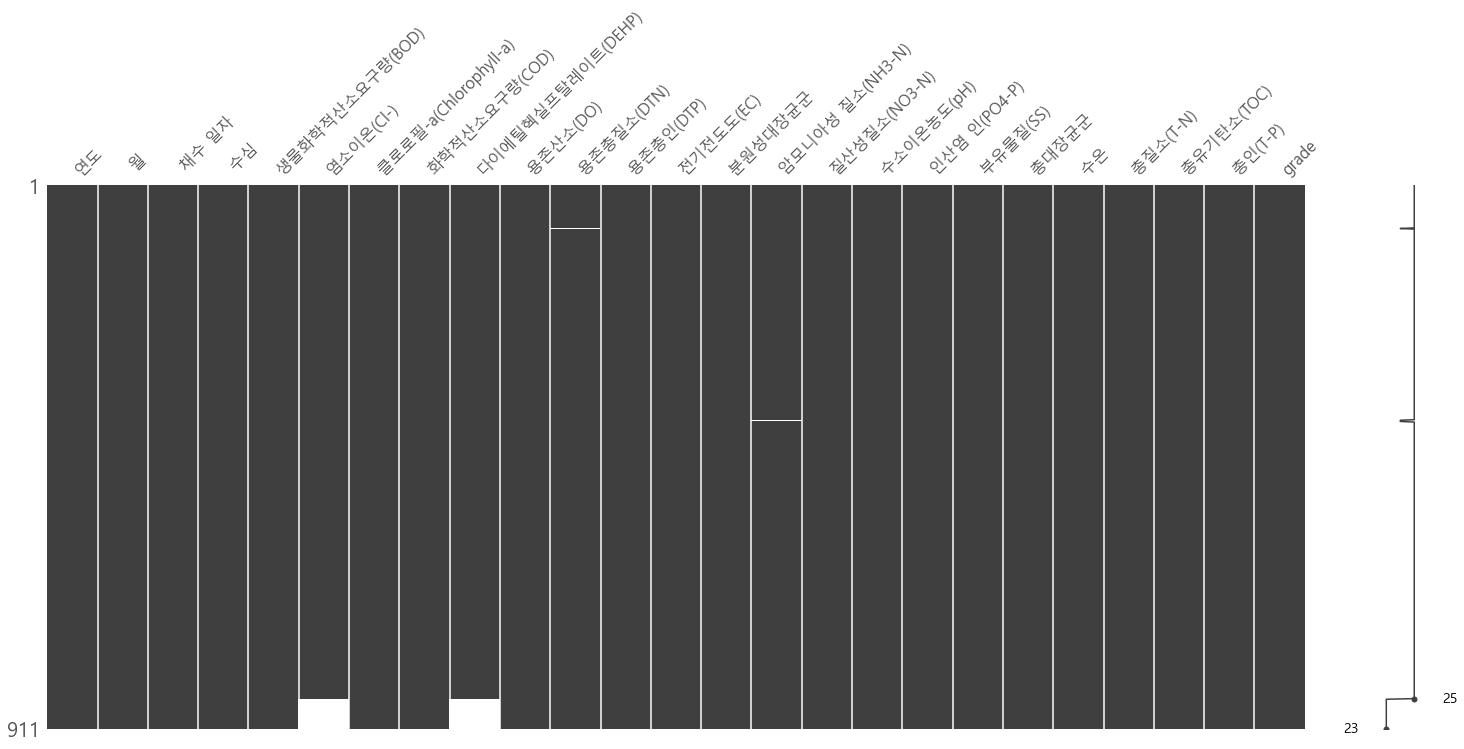

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 2050
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   연도                     911 non-null    int64  
 1    월                     911 non-null    int64  
 2    채수 일자                 911 non-null    object 
 3    수심                    911 non-null    float64
 4   생물화학적산소요구량(BOD)        911 non-null    float64
 5   염소이온(Cl-)              860 non-null    float64
 6   클로로필-a(Chlorophyll-a)  911 non-null    float64
 7   화학적산소요구량(COD)          911 non-null    float64
 8   다이에틸헥실프탈레이트(DEHP)      860 non-null    float64
 9   용존산소(DO)               911 non-null    float64
 10  용존총질소(DTN)             910 non-null    float64
 11  용존총인(DTP)              911 non-null    float64
 12  전기전도도(EC)              911 non-null    float64
 13  분원성대장균군                911 non-null    float64
 14  암모니아성 질소(NH3-N)        908 non-null    float64
 15  질산성질소

In [21]:
#결측 데이터를 시각화 함수 
#결측 데이터는 흰색, 그렇지 않은 데이터는 검은색 
msno.matrix(kwater_data)
plt.show()
print(kwater_data.info())

#### 수심에 따른 데이터 카테고리 변수 확인
    - 상층권 0.5 이하 / 중층권 5이상 11이하 / 하층권 12이상 

In [24]:
# 수심에 따른 층권별 데이터 개수 확인
kwater_up = kwater_data[kwater_data[' 수심']<=0.5]
kwater_mid = kwater_data[(5<= kwater_data[' 수심']) & (kwater_data[' 수심']<=11)]
kwater_bottom = kwater_data[kwater_data[' 수심'] >=12]
print('상층권 데이터 개수:' , kwater_up.shape)
print('중층권 데이터 개수:' , kwater_mid.shape)
print('하층권 데이터 개수:' , kwater_bottom.shape)

상층권 데이터 개수: (313, 25)
중층권 데이터 개수: (300, 25)
하층권 데이터 개수: (298, 25)


In [25]:
### 결측치 있는 컬럼 확인 
print('상층권 : ', kwater_up.info())
print('='*50)
print('중층권 : ', kwater_mid.info())
print('='*50)
print('하층권 : ', kwater_bottom.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 2048
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   연도                     313 non-null    int64         
 1    월                     313 non-null    int64         
 2    채수 일자                 313 non-null    datetime64[ns]
 3    수심                    313 non-null    float64       
 4   생물화학적산소요구량(BOD)        313 non-null    float64       
 5   염소이온(Cl-)              296 non-null    float64       
 6   클로로필-a(Chlorophyll-a)  313 non-null    float64       
 7   화학적산소요구량(COD)          313 non-null    float64       
 8   다이에틸헥실프탈레이트(DEHP)      296 non-null    float64       
 9   용존산소(DO)               313 non-null    float64       
 10  용존총질소(DTN)             312 non-null    float64       
 11  용존총인(DTP)              313 non-null    float64       
 12  전기전도도(EC)              313 non-null    float64       
 13  분원성대

### BOX_PLOT 확인
    - 층권별로 사분위 값들을 확인

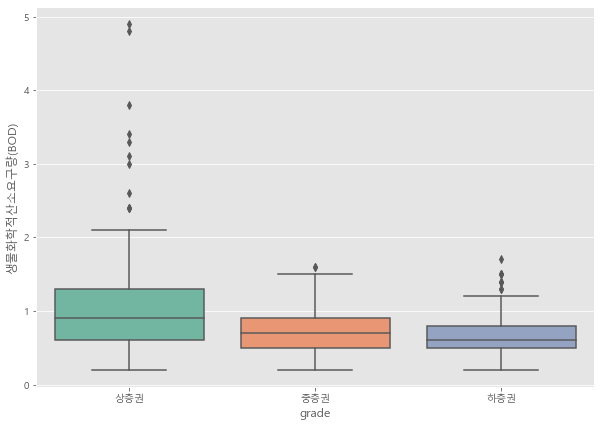

In [26]:
plt.figure(figsize = (10, 7))
# 색 팔레트, 선 굵기, 박스 너비 지정
bx = sns.boxplot(x = 'grade', y = '생물화학적산소요구량(BOD)', data = kwater_data, palette = 'Set2')

# x축 이름 설정
plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

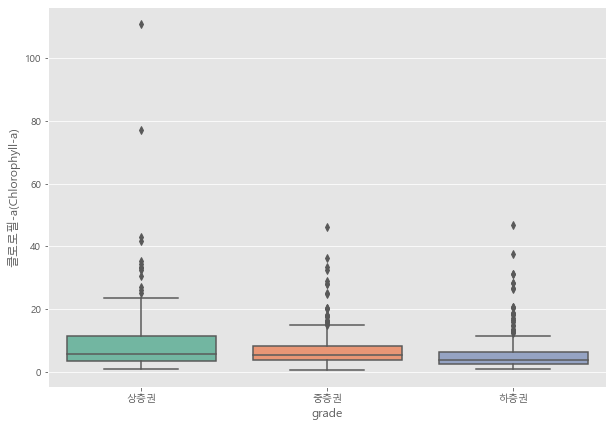

In [83]:
plt.figure(figsize = (10, 7))
# 색 팔레트, 선 굵기, 박스 너비 지정
bx = sns.boxplot(x = 'grade', y ='클로로필-a(Chlorophyll-a)', data = kwater_data, palette = 'Set2')

# x축 이름 설정
plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

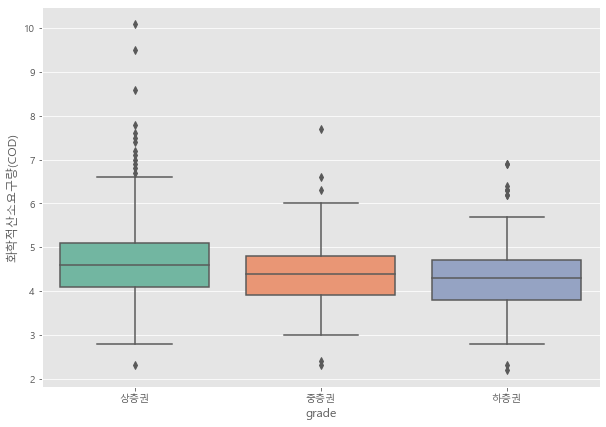

In [84]:
#화학적산소요구량(COD) 박스플롯 
plt.figure(figsize = (10, 7))
# 색 팔레트, 선 굵기, 박스 너비 지정
bx = sns.boxplot(x = 'grade', y ='화학적산소요구량(COD)', data = kwater_data, palette = 'Set2')

# x축 이름 설정
plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

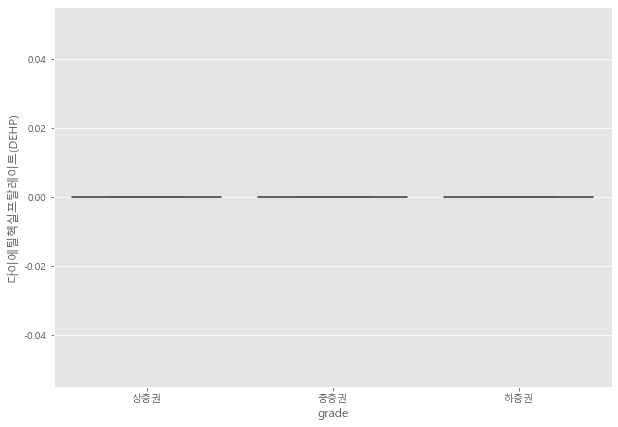

In [85]:
#화학적산소요구량(COD) 박스플롯 
plt.figure(figsize = (10, 7))

bx = sns.boxplot(x = 'grade', y ='다이에틸헥실프탈레이트(DEHP)', data = kwater_data, palette = 'Set2')

# x축 이름 설정
plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

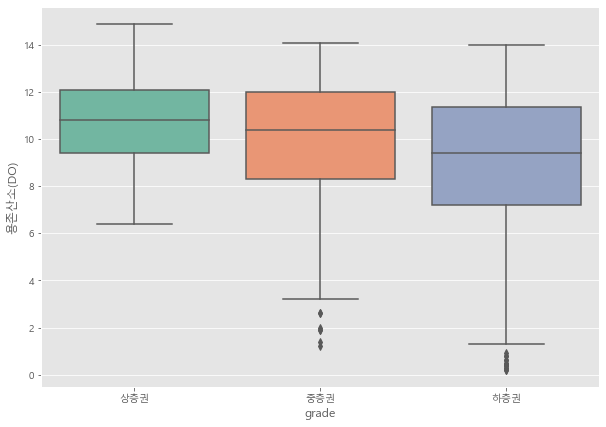

In [86]:
# 용존산소(DO) 박스플롯 
plt.figure(figsize = (10, 7))

bx = sns.boxplot(x = 'grade', y ='용존산소(DO)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

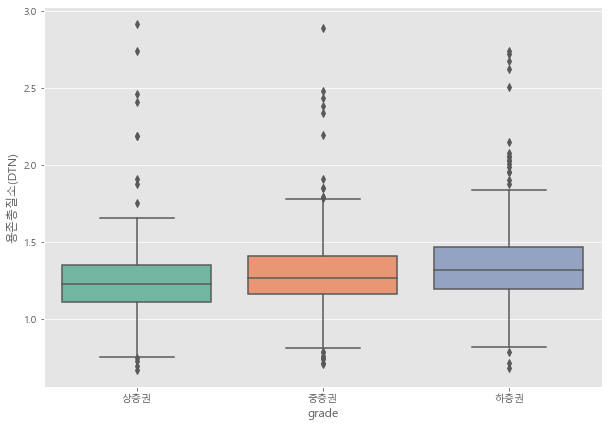

In [87]:
# 용존총질소(DTN) 박스플롯 
plt.figure(figsize = (10, 7))

bx = sns.boxplot(x = 'grade', y ='용존총질소(DTN)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

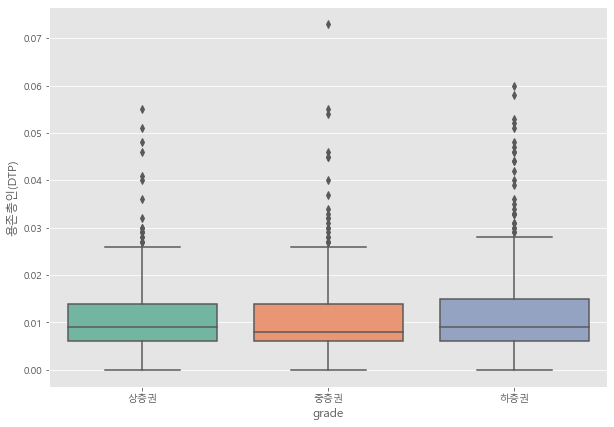

In [88]:
# 용존총인(DTP) 박스플롯 
plt.figure(figsize = (10, 7))

bx = sns.boxplot(x = 'grade', y ='용존총인(DTP)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

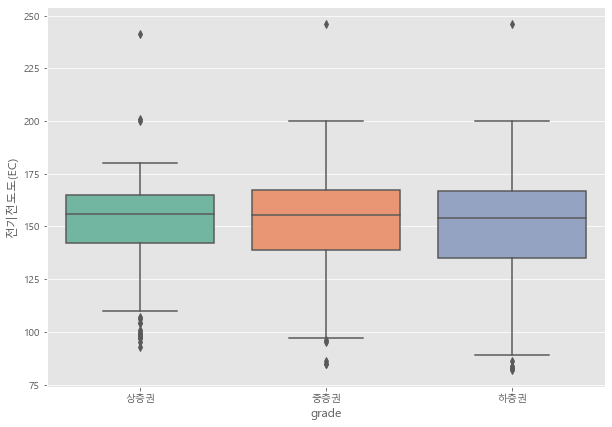

In [89]:
# 전기전도도(EC) 박스플롯 
plt.figure(figsize = (10, 7))

bx = sns.boxplot(x = 'grade', y ='전기전도도(EC)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

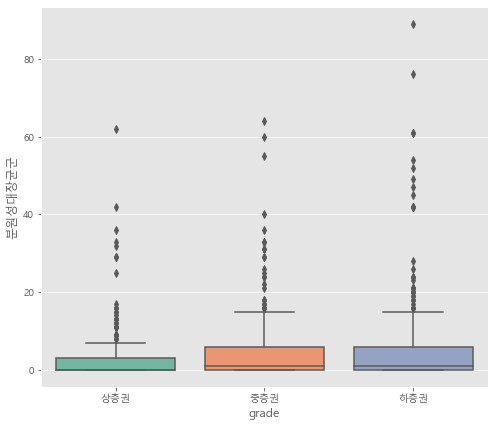

In [91]:
# 분원성대장균군 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='분원성대장균군', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

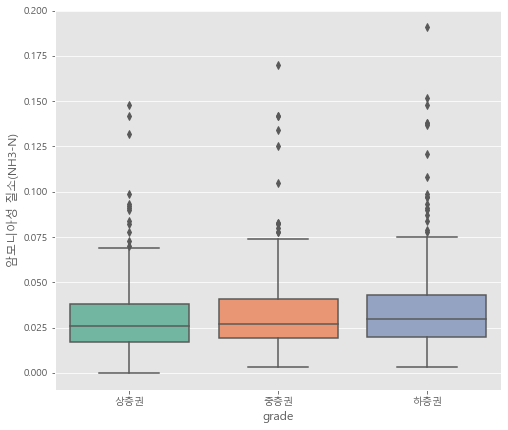

In [92]:
# 암모니아성 질소(NH3-N) 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='암모니아성 질소(NH3-N)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

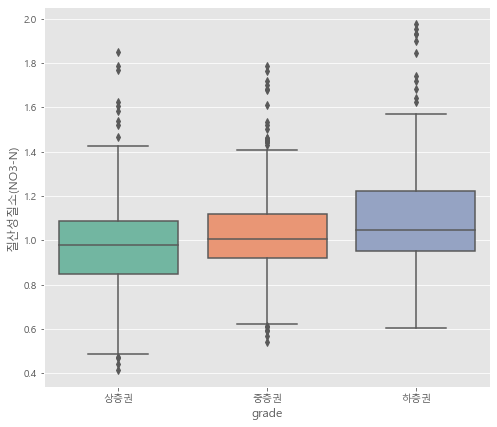

In [93]:
#질산성질소(NO3-N) 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='질산성질소(NO3-N)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

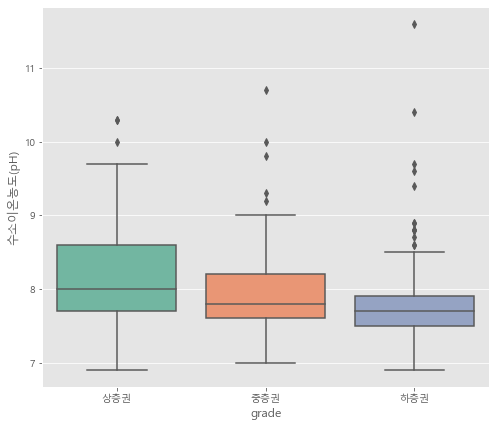

In [94]:
# 수소이온농도(pH) 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='수소이온농도(pH)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

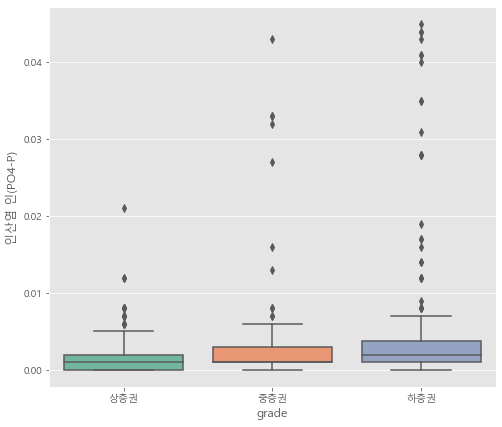

In [95]:
# 인산염 인(PO4-P) 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='인산염 인(PO4-P)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

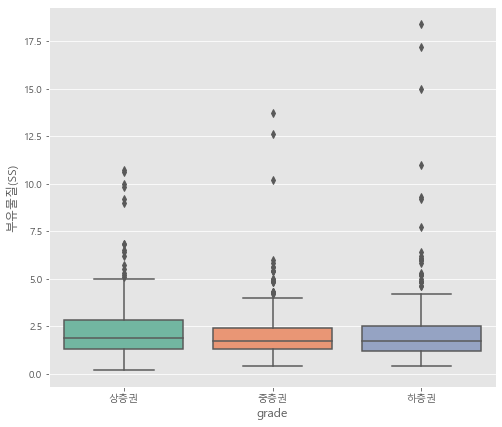

In [97]:
# 부유물질(SS) 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='부유물질(SS)', data = kwater_data, palette = 'Set2')

# x축 이름 설정
plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

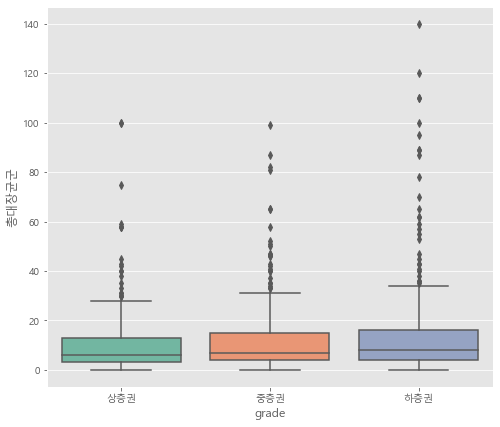

In [98]:
#수소이온농도(pH) 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='총대장균군', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

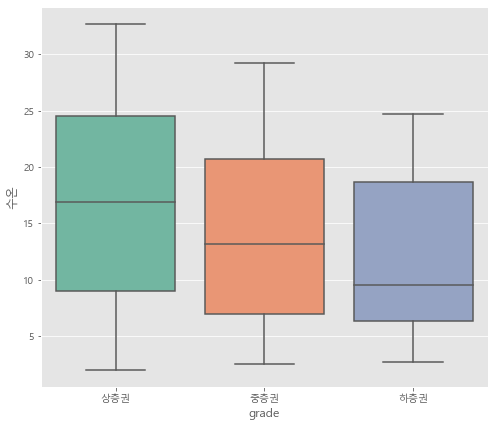

In [99]:
# 수온 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='수온', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

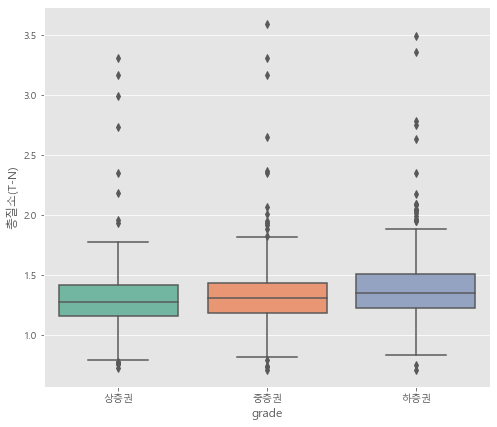

In [100]:
# 총질소(T-N) 박스플롯 
plt.figure(figsize = (8, 7))
bx = sns.boxplot(x = 'grade', y ='총질소(T-N)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

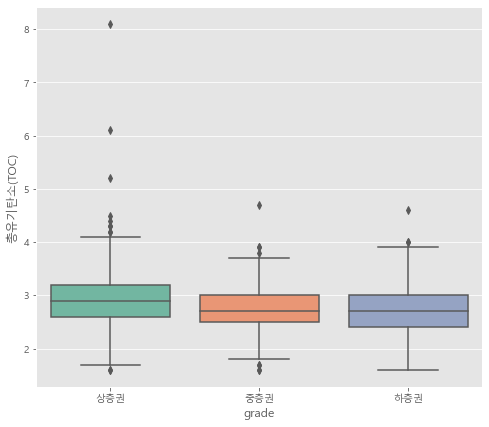

In [101]:
# 총유기탄소(TOC) 박스플롯 
plt.figure(figsize = (8, 7))
bx = sns.boxplot(x = 'grade', y ='총유기탄소(TOC)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

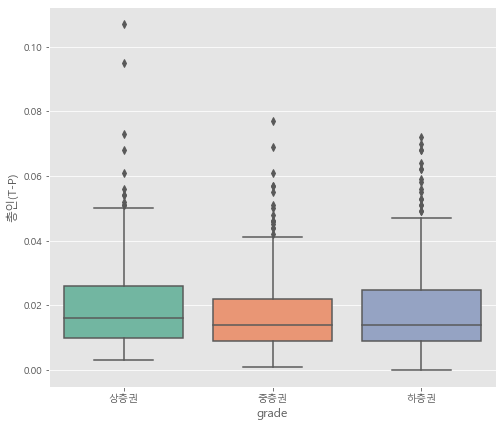

In [102]:
# 총인(T-P) 박스플롯 
plt.figure(figsize = (8, 7))

bx = sns.boxplot(x = 'grade', y ='총인(T-P)', data = kwater_data, palette = 'Set2')

plt.xticks(range(3), ['상층권', '중층권', '하층권'])

plt.show()

## 변수들의 형태 그래프 확인

<AxesSubplot:xlabel=' 채수 일자', ylabel='다이에틸헥실프탈레이트(DEHP)'>

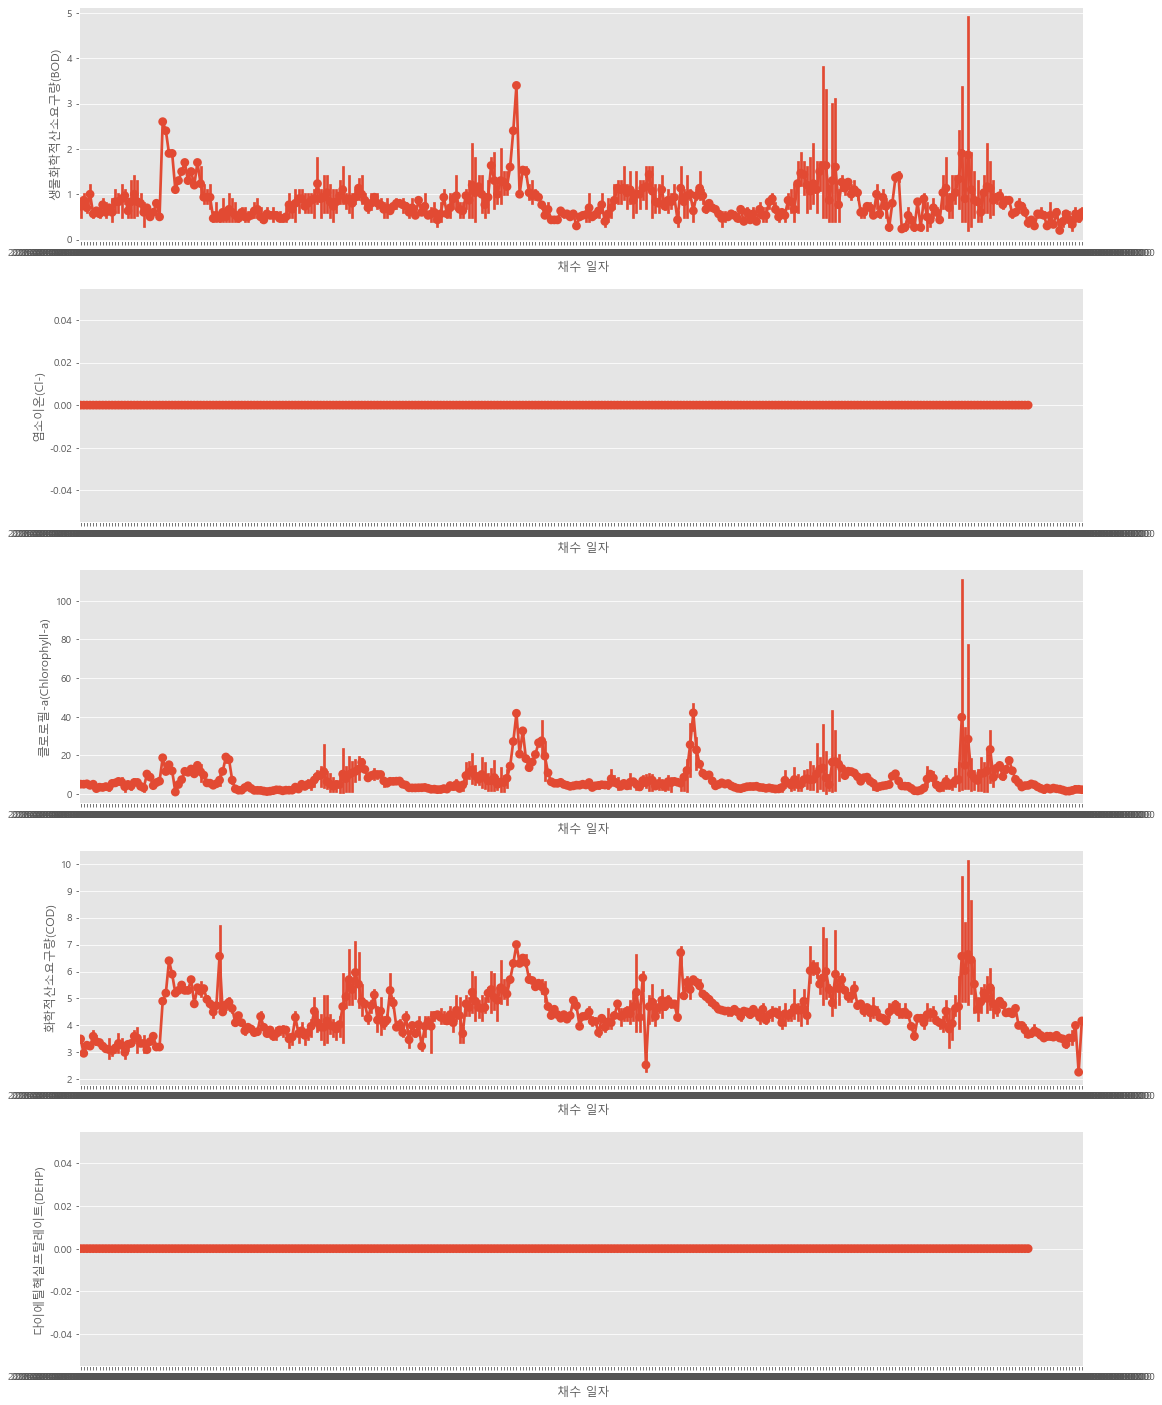

In [35]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="", ax=ax1)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="", ax=ax2)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="", ax=ax3)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="", ax=ax4)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='분원성대장균군'>

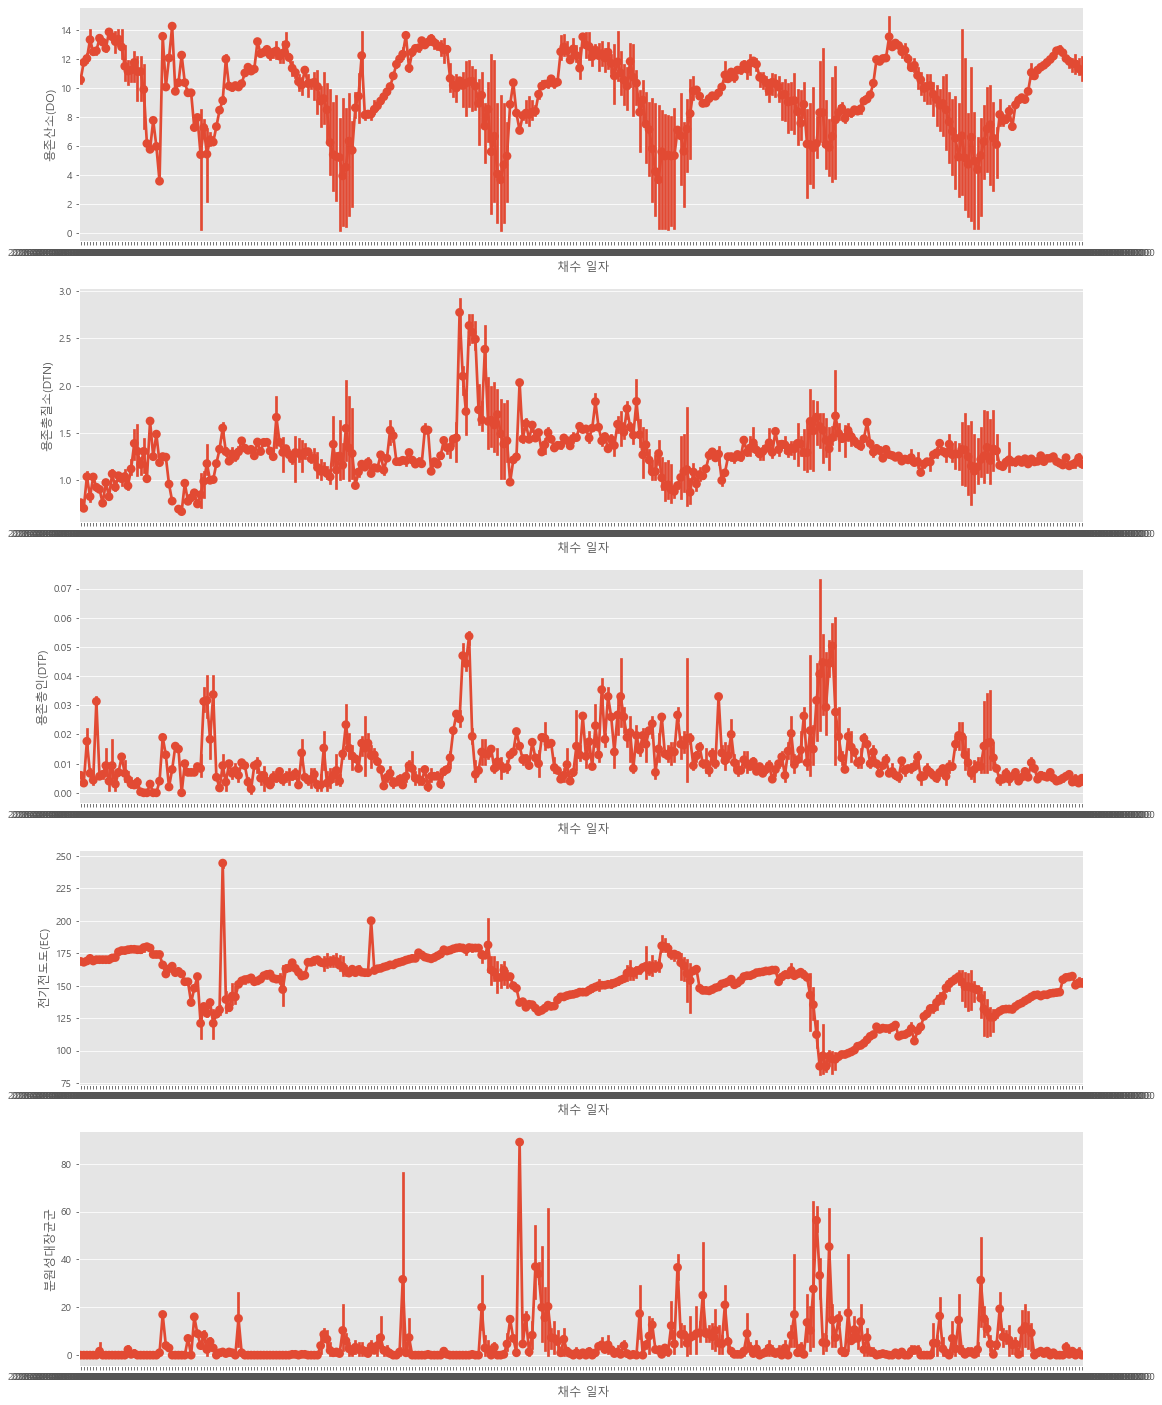

In [31]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="용존산소(DO)", ax=ax1)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="용존총질소(DTN)", ax=ax2)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="용존총인(DTP)", ax=ax3)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="전기전도도(EC)", ax=ax4)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="분원성대장균군", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='부유물질(SS)'>

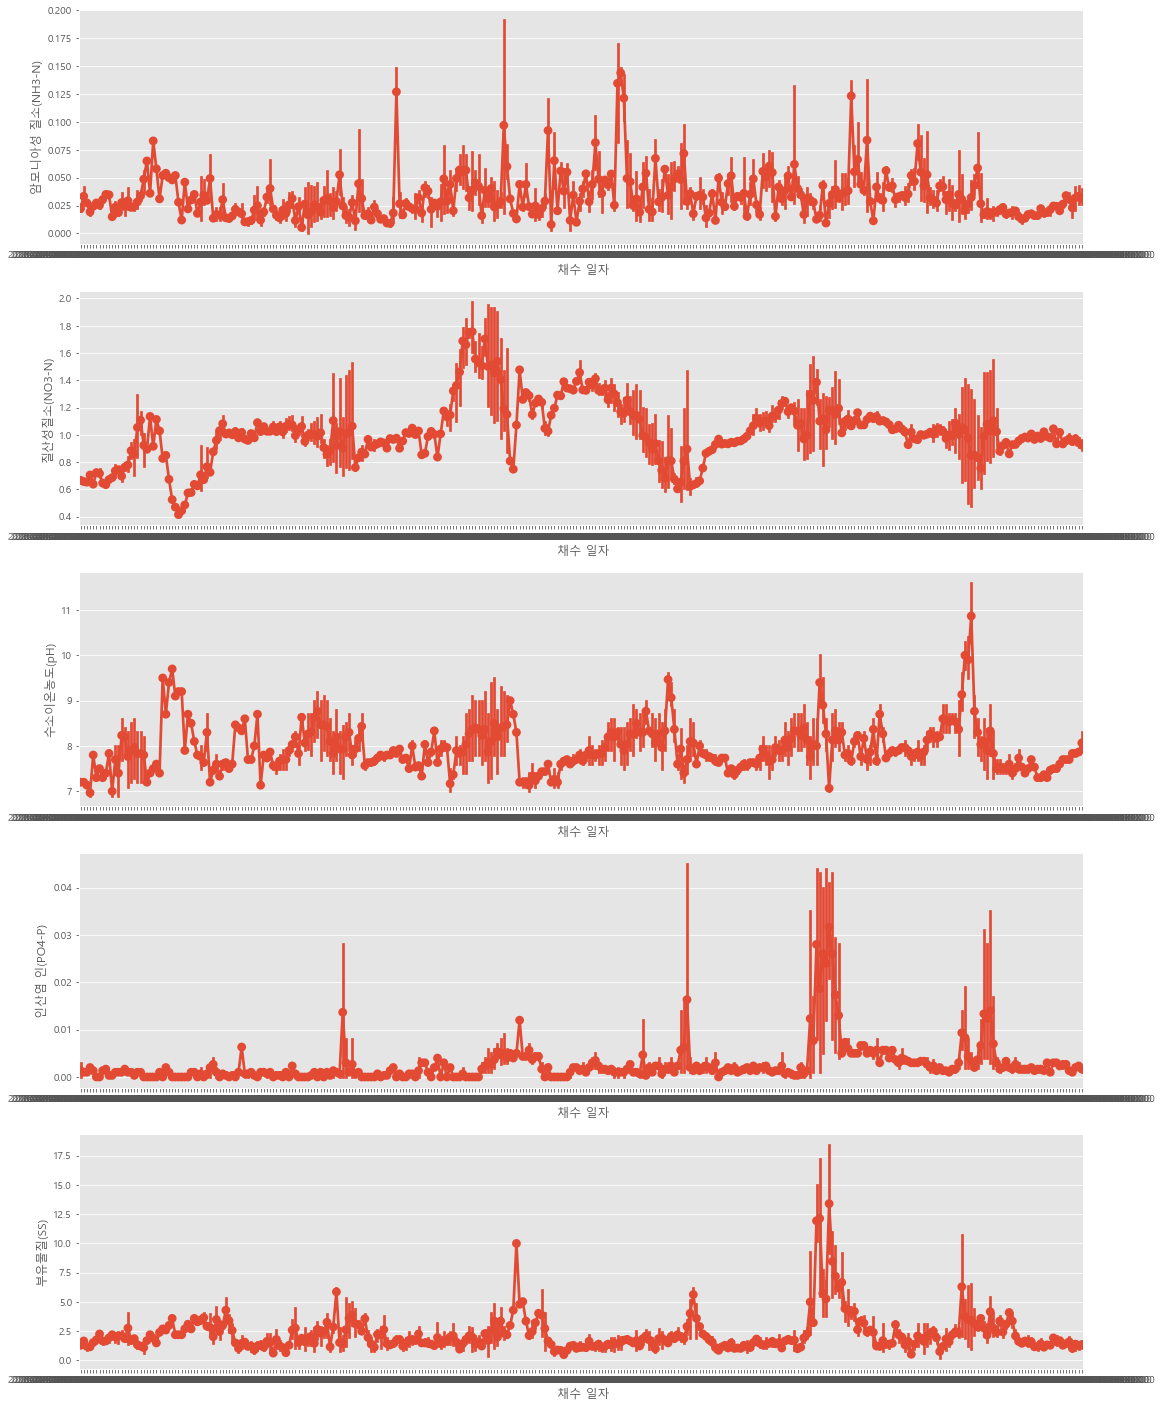

In [32]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="암모니아성 질소(NH3-N)", ax=ax1)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="질산성질소(NO3-N)", ax=ax2)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="수소이온농도(pH)", ax=ax3)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="인산염 인(PO4-P)", ax=ax4)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="부유물질(SS)", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='총인(T-P)'>

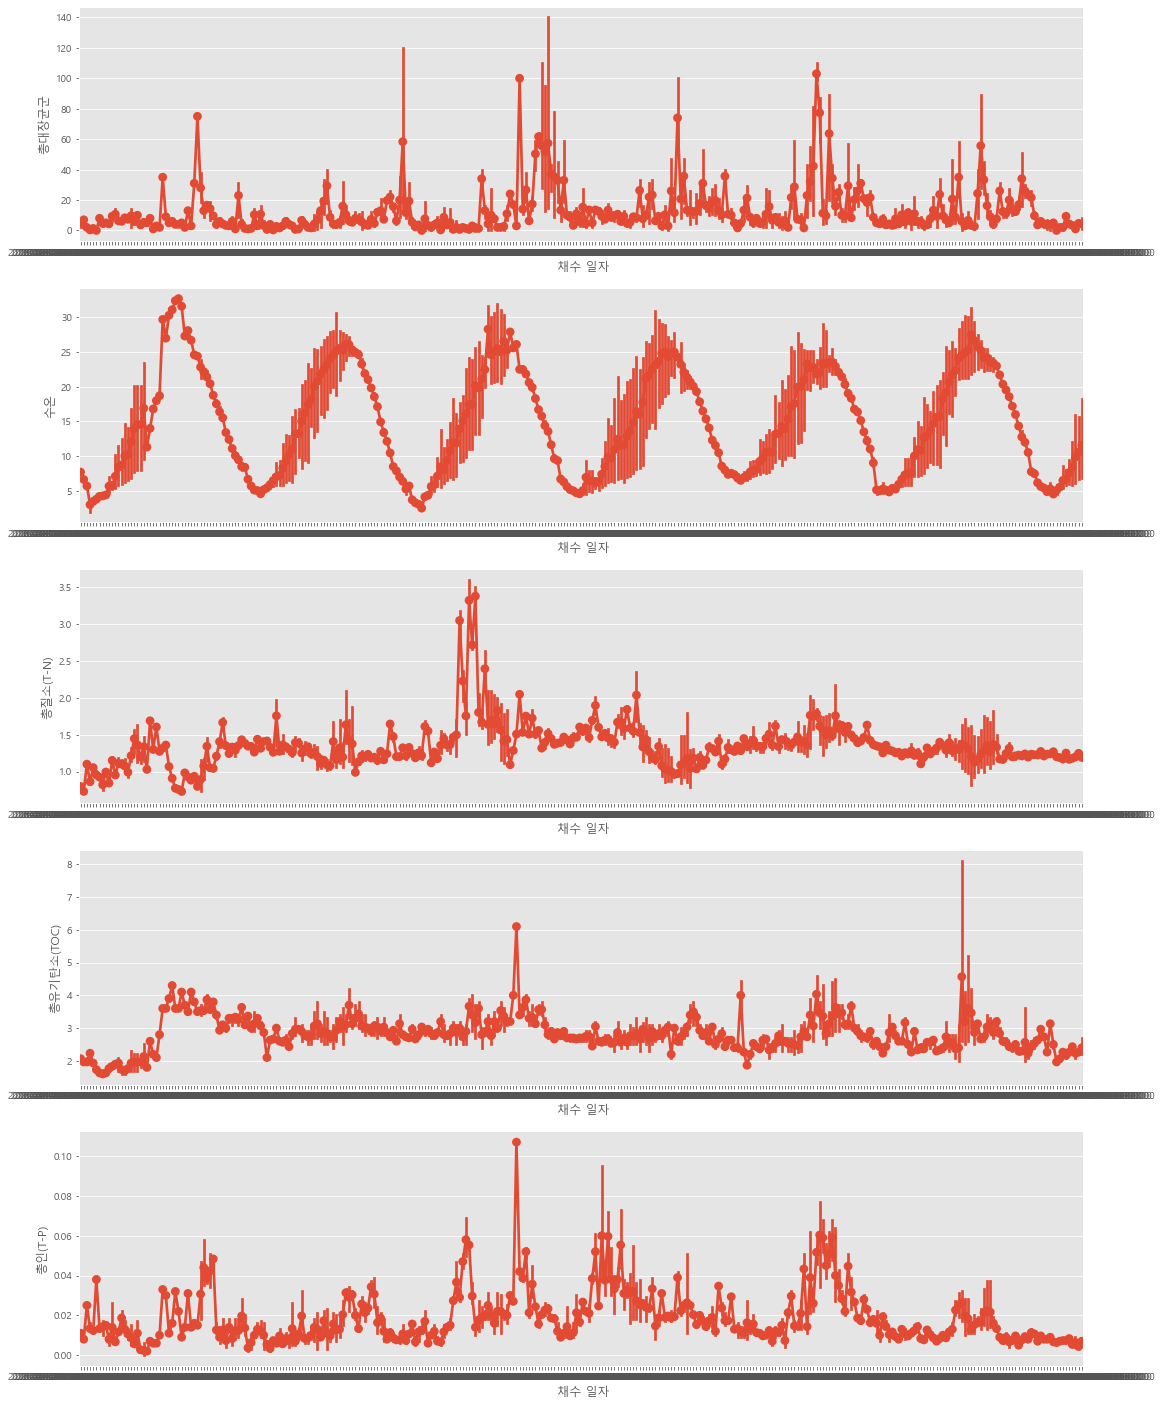

In [33]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="총대장균군", ax=ax1)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="수온", ax=ax2)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="총질소(T-N)", ax=ax3)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="총유기탄소(TOC)", ax=ax4)

sns.pointplot(data= kwater_data, x=" 채수 일자", y="총인(T-P)", ax=ax5)

### 층권별 변수 그래프 확인
 - 상층권

<AxesSubplot:xlabel=' 채수 일자', ylabel='다이에틸헥실프탈레이트(DEHP)'>

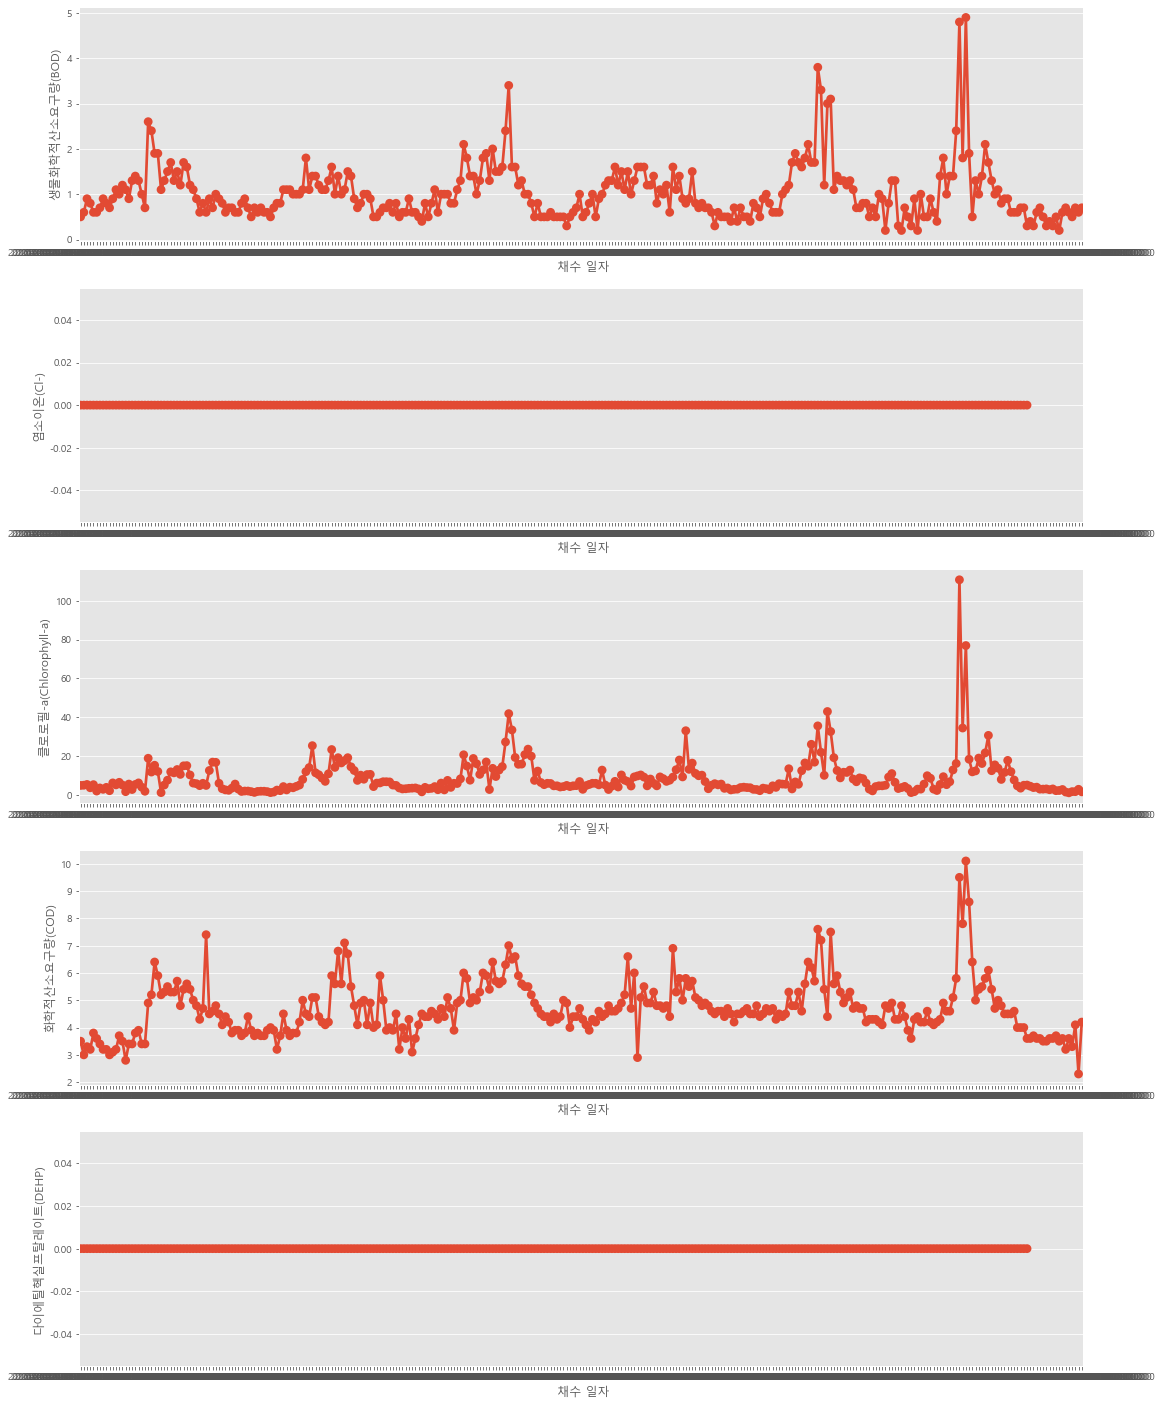

In [36]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="생물화학적산소요구량(BOD)", ax=ax1)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="염소이온(Cl-)", ax=ax2)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="클로로필-a(Chlorophyll-a)", ax=ax3)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="화학적산소요구량(COD)", ax=ax4)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="다이에틸헥실프탈레이트(DEHP)", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='분원성대장균군'>

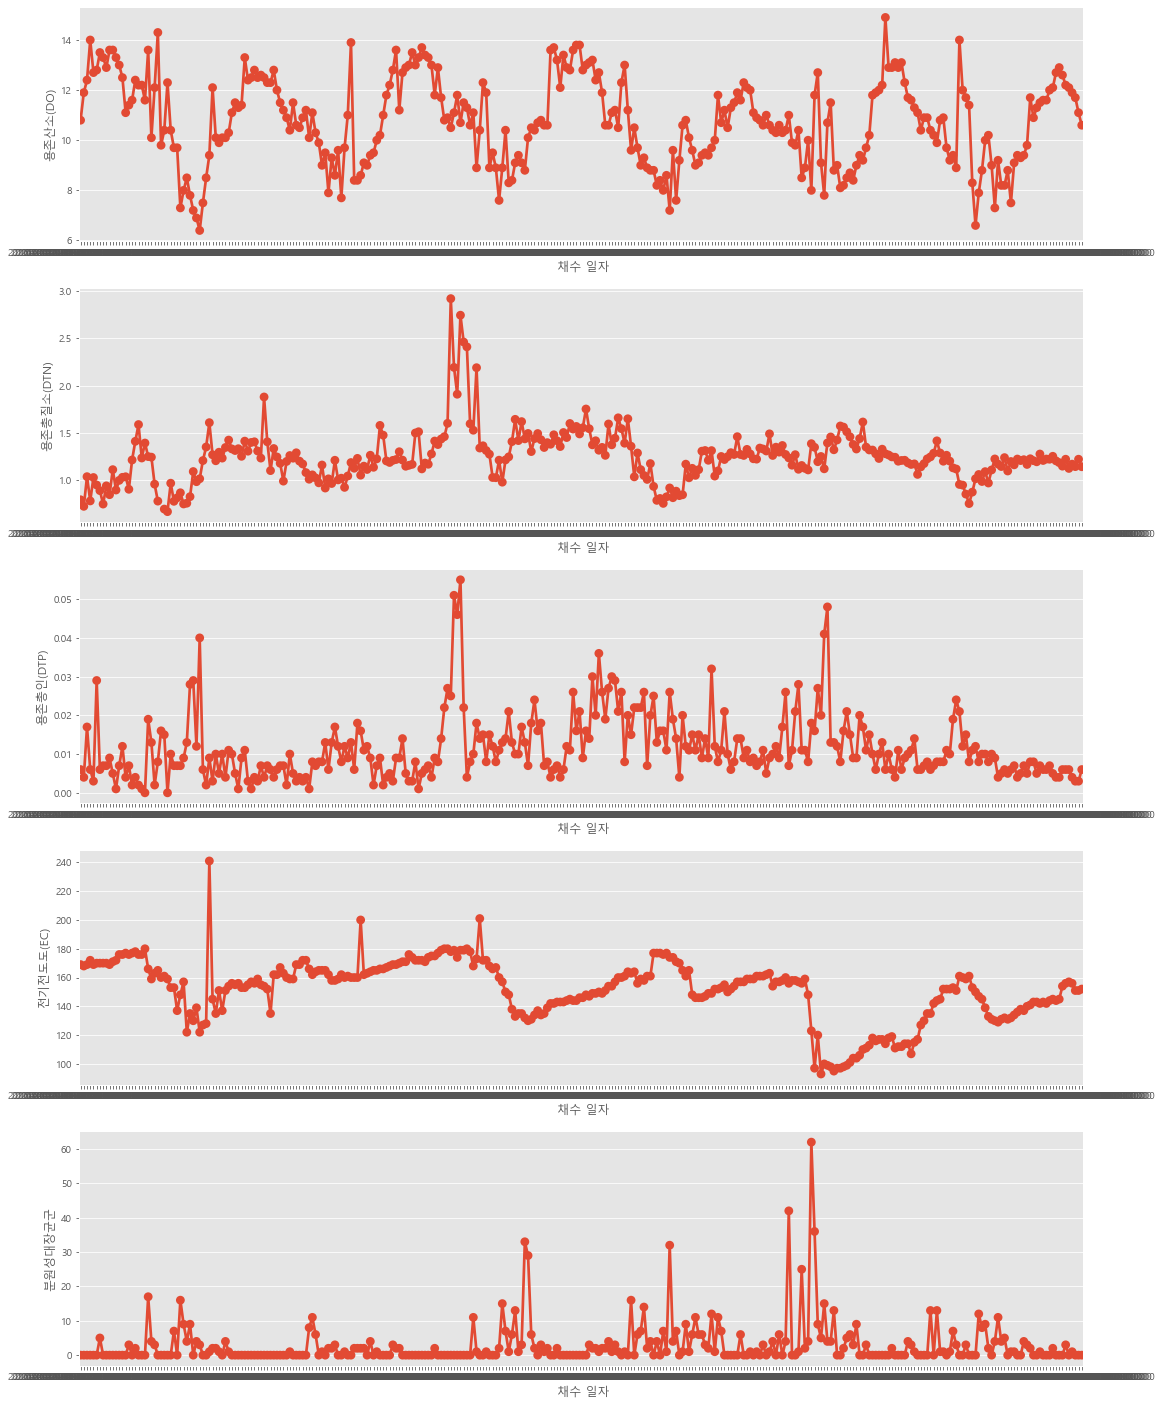

In [37]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="용존산소(DO)", ax=ax1)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="용존총질소(DTN)", ax=ax2)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="용존총인(DTP)", ax=ax3)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="전기전도도(EC)", ax=ax4)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="분원성대장균군", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='부유물질(SS)'>

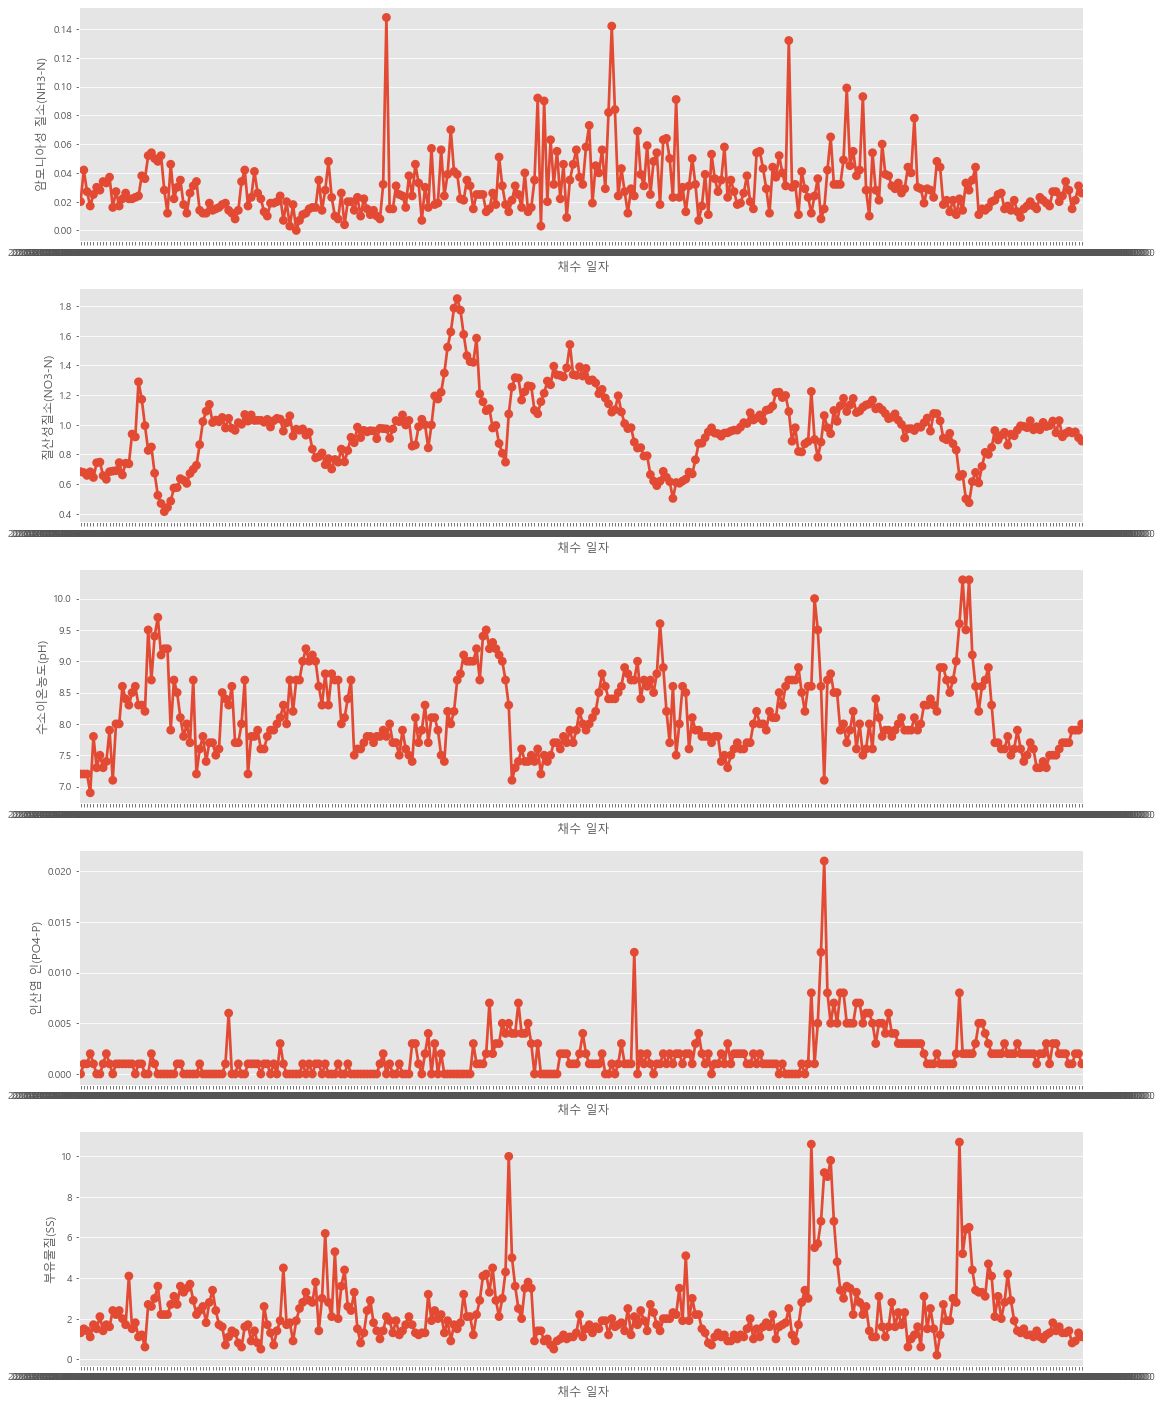

In [38]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="암모니아성 질소(NH3-N)", ax=ax1)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="질산성질소(NO3-N)", ax=ax2)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="수소이온농도(pH)", ax=ax3)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="인산염 인(PO4-P)", ax=ax4)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="부유물질(SS)", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='총인(T-P)'>

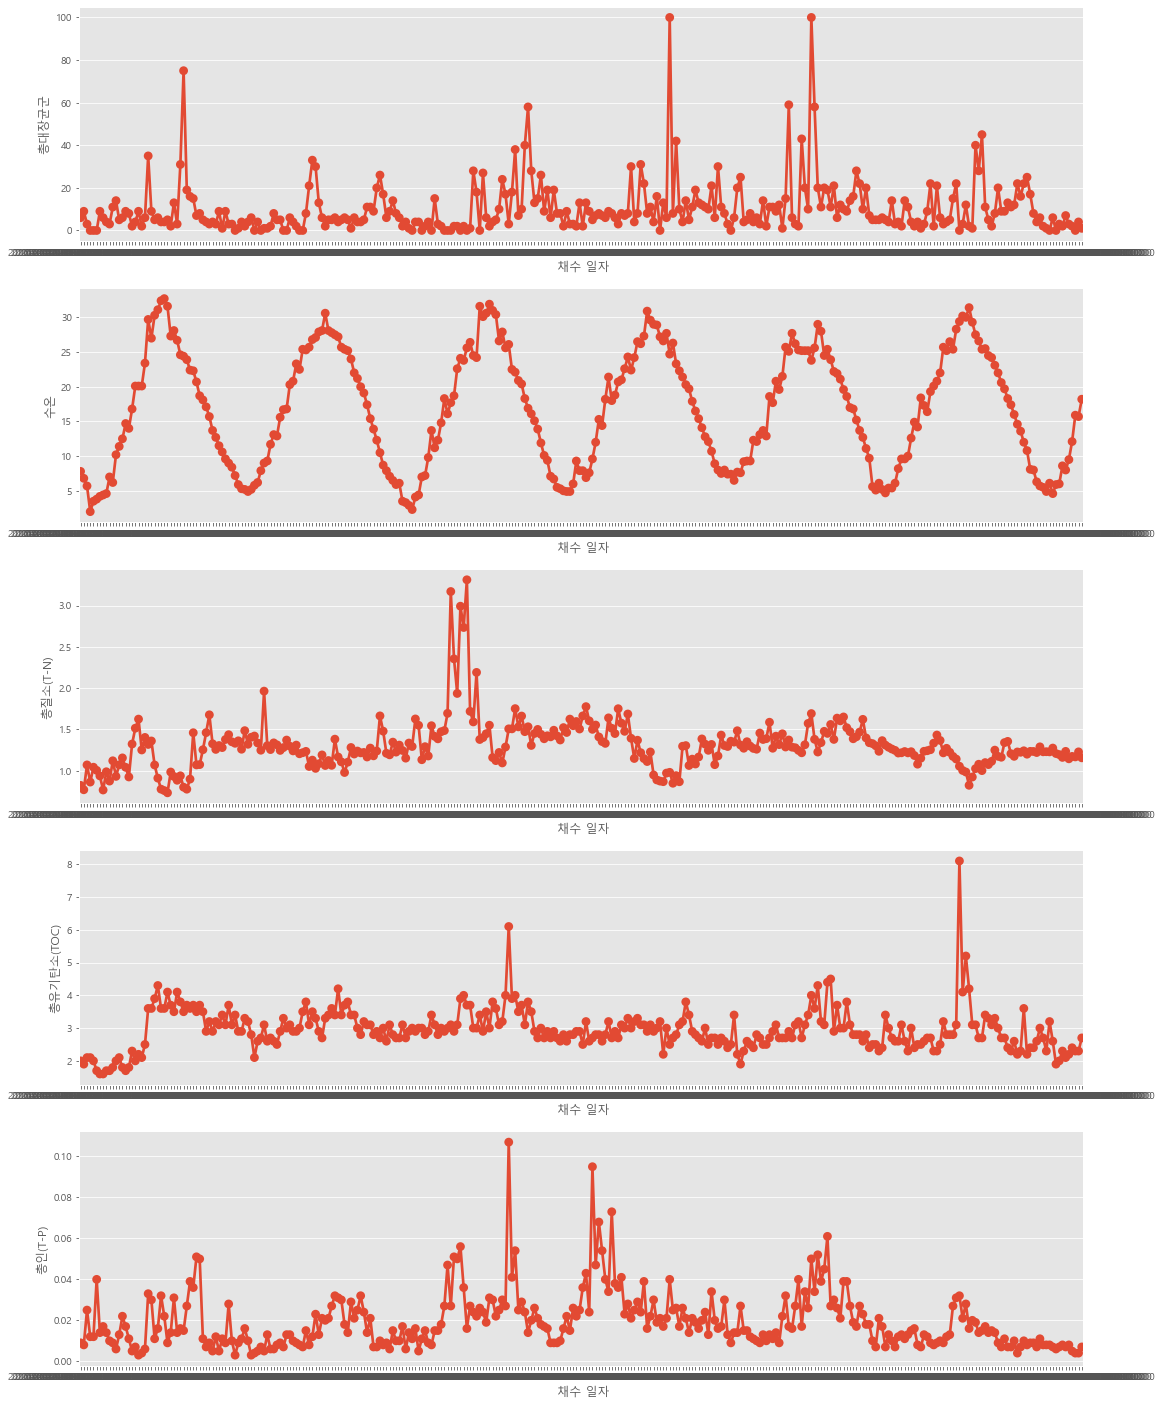

In [39]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="총대장균군", ax=ax1)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="수온", ax=ax2)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="총질소(T-N)", ax=ax3)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="총유기탄소(TOC)", ax=ax4)

sns.pointplot(data= kwater_up, x=" 채수 일자", y="총인(T-P)", ax=ax5)

### 층권별 변수 그래프 확인
 - 중층권
 

<AxesSubplot:xlabel=' 채수 일자', ylabel='다이에틸헥실프탈레이트(DEHP)'>

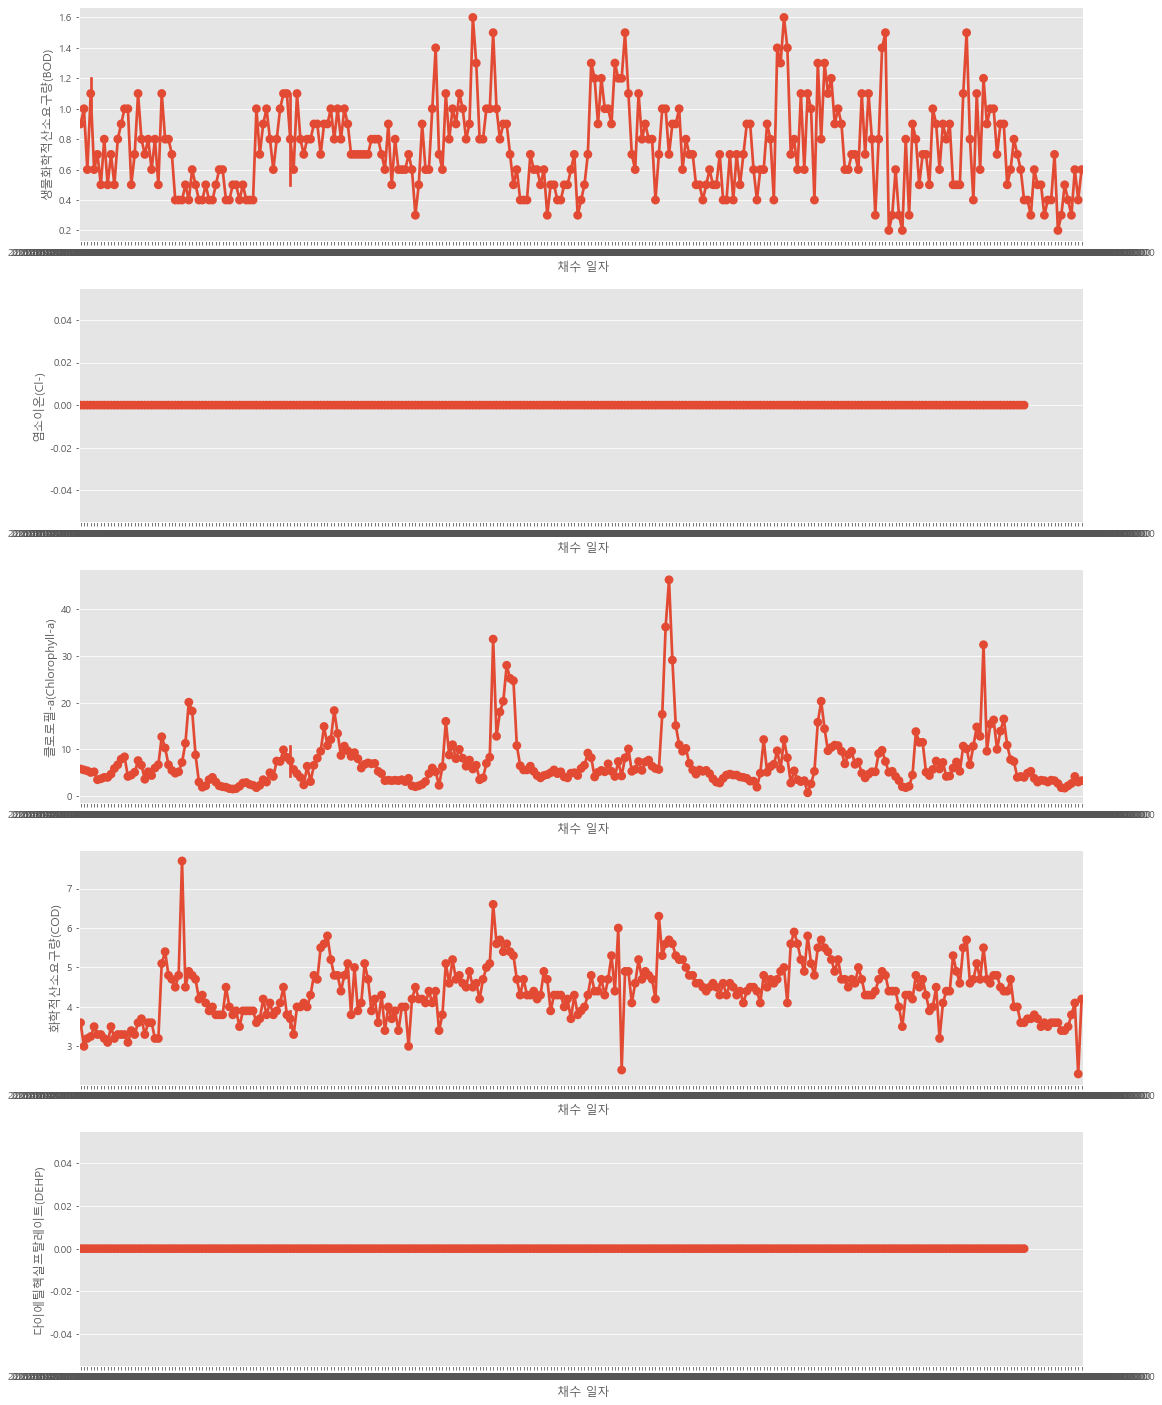

In [45]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="생물화학적산소요구량(BOD)", ax=ax1)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="염소이온(Cl-)", ax=ax2)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="클로로필-a(Chlorophyll-a)", ax=ax3)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="화학적산소요구량(COD)", ax=ax4)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="다이에틸헥실프탈레이트(DEHP)", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='분원성대장균군'>

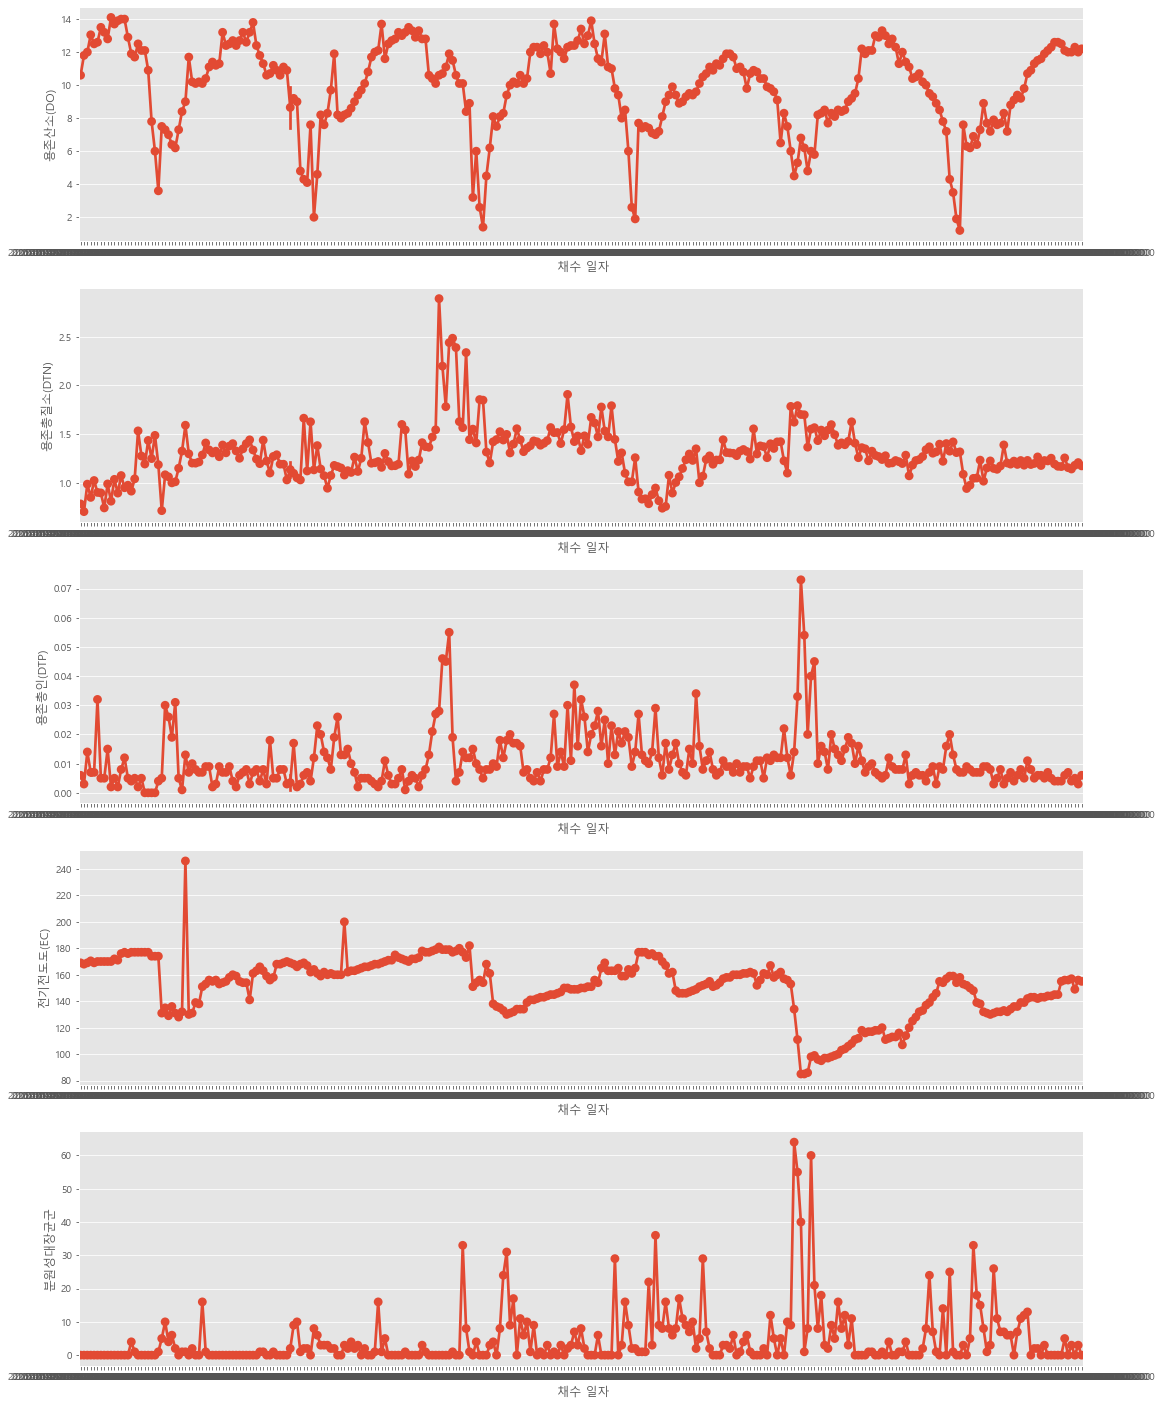

In [46]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="용존산소(DO)", ax=ax1)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="용존총질소(DTN)", ax=ax2)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="용존총인(DTP)", ax=ax3)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="전기전도도(EC)", ax=ax4)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="분원성대장균군", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='부유물질(SS)'>

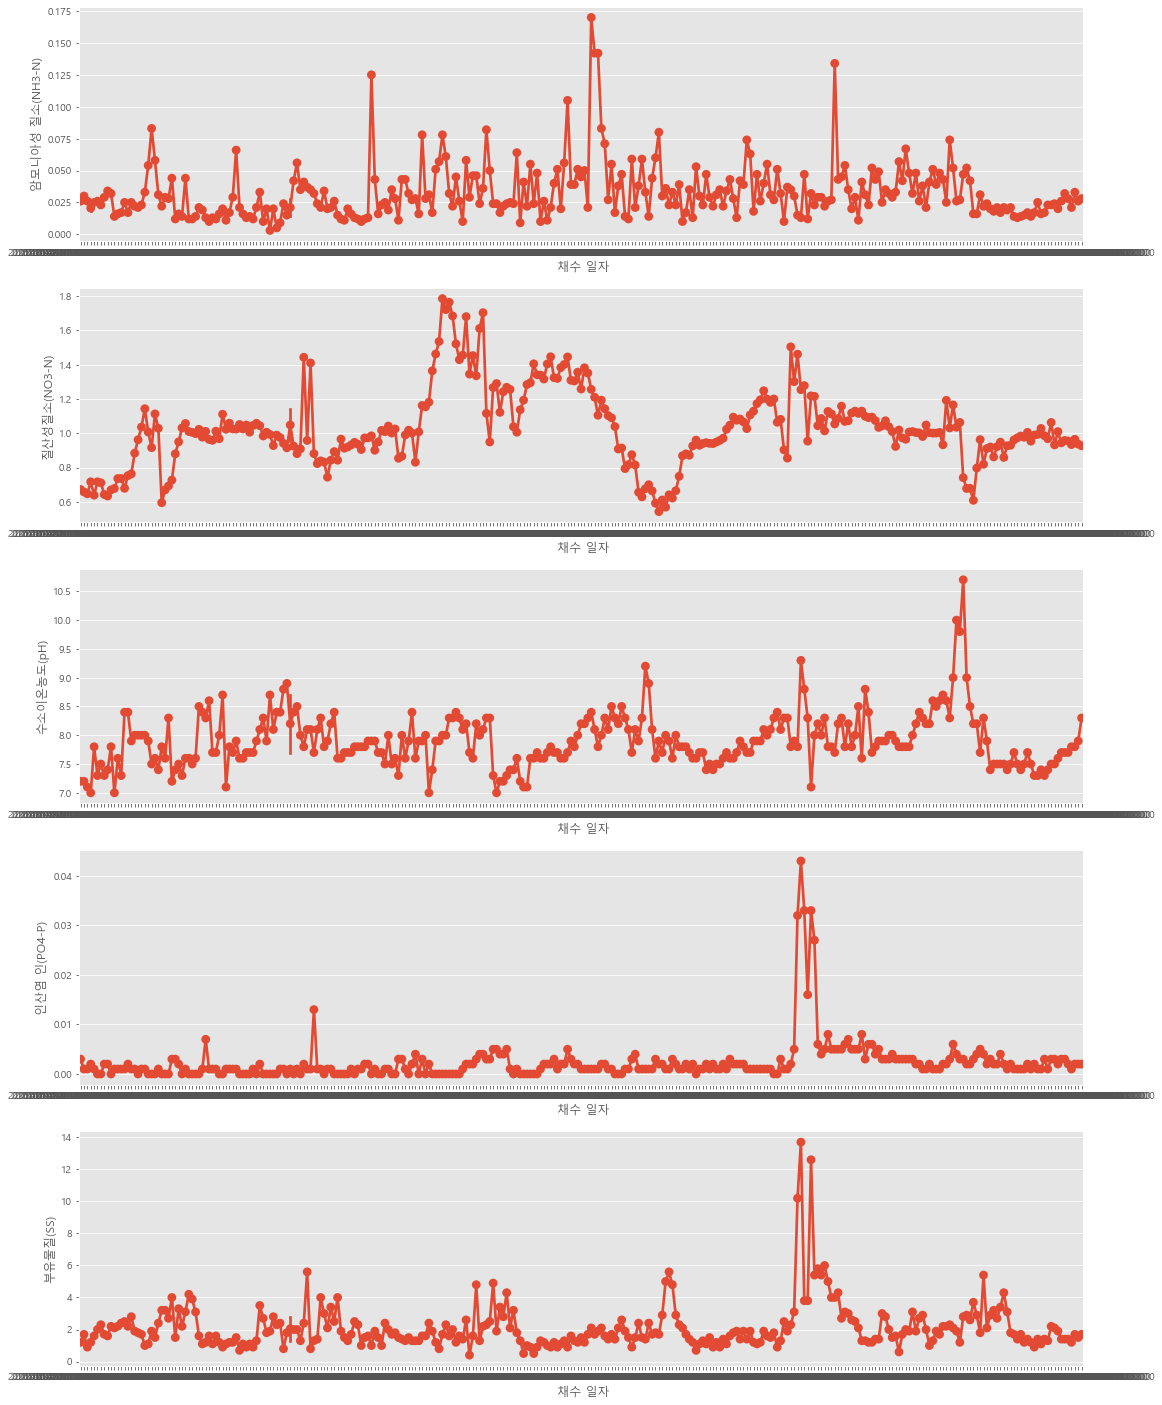

In [47]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="암모니아성 질소(NH3-N)", ax=ax1)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="질산성질소(NO3-N)", ax=ax2)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="수소이온농도(pH)", ax=ax3)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="인산염 인(PO4-P)", ax=ax4)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="부유물질(SS)", ax=ax5)

<AxesSubplot:xlabel=' 채수 일자', ylabel='총인(T-P)'>

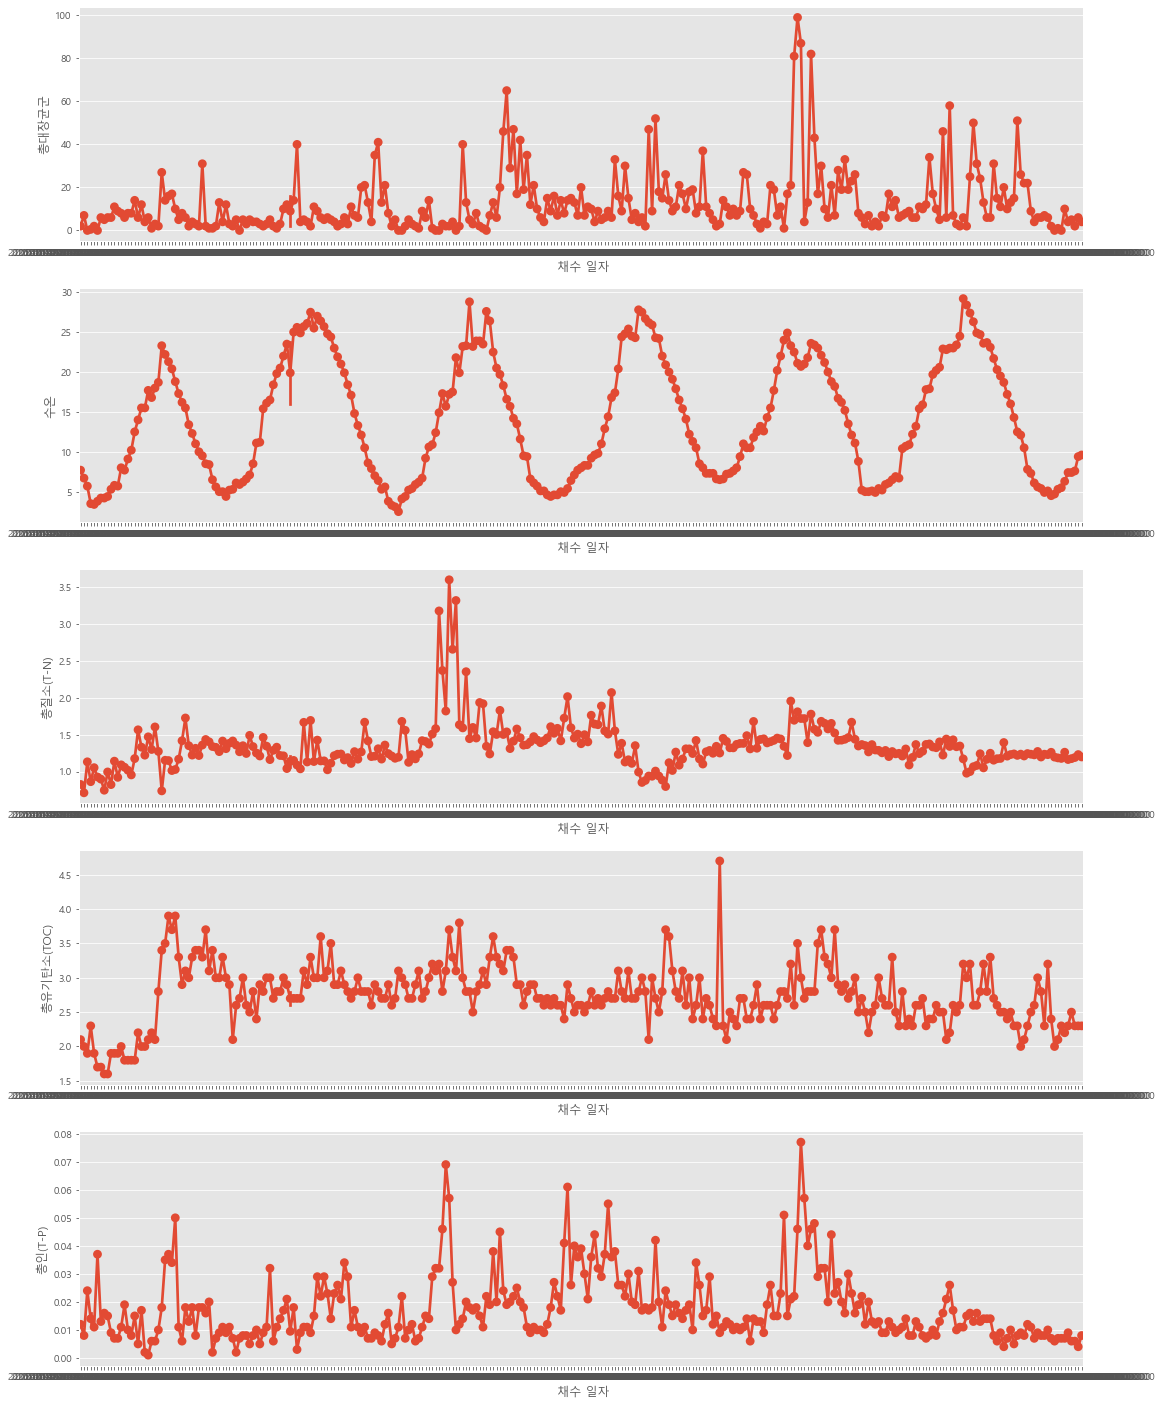

In [48]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows= 5)
fig.set_size_inches(18, 25)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="총대장균군", ax=ax1)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="수온", ax=ax2)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="총질소(T-N)", ax=ax3)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="총유기탄소(TOC)", ax=ax4)

sns.pointplot(data= kwater_mid, x=" 채수 일자", y="총인(T-P)", ax=ax5)